
# Analysis of IMDB-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset that we are going to analyze is tmdb-movies. It consists of around 10000 movies. Also, it has User ratings, revenue.It has columns like popularity, budget, cast, and genres of the movies. The questions which I planned to explore in this movies dataset are as the following:
>Which genres are most popular from year to year?
>What kinds of properties are associated with movies that have high revenues?
>What are the genres that have high releases?


>Importing Python libraries that will be used in this project:

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> First, load the dataset of the tmdb-movies and read the first 4 rows of the dataset:

In [154]:
df = pd.read_csv('tmdb-movies.csv')
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


>Second, print the number of rows and columns:

In [155]:
df.shape

(10866, 21)

>Third, print a descriptive statistic summary of the dataset to take a look at the important properties that will be used in the exploration:

In [156]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Then, print a summary of the dataset to see the missing values, columns that will be used, and irrelevant columns that will be dropped:

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
> From the information above, there ara missing values in imdb_id, cast, homepage, director, tagline, tagline, overview, runtime, genres, and production_companies. 


>Delete irrelevant columns which are: id, imdb_id, budget, original_title, cast,
          homepage, director, tagline, keywords, overview, production_companies:

In [158]:
df.drop(['id','imdb_id','budget','original_title','cast',
          'homepage','director','tagline','keywords','overview',
        'production_companies'] , axis=1 , inplace=True)

>See the dataset after the changes:

In [159]:
df.head()

,popularity,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Check the summery information after changes:

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   revenue       10866 non-null  int64  
 2   runtime       10866 non-null  int64  
 3   genres        10843 non-null  object 
 4   release_date  10866 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   release_year  10866 non-null  int64  
 8   budget_adj    10866 non-null  float64
 9   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


> From the data above, genres column have missing values. Lets check them in the following cell:

In [161]:
df[df.genres.isnull()]

,popularity,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0



>Delete null values and save changes:

In [162]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10843 non-null  float64
 1   revenue       10843 non-null  int64  
 2   runtime       10843 non-null  int64  
 3   genres        10843 non-null  object 
 4   release_date  10843 non-null  object 
 5   vote_count    10843 non-null  int64  
 6   vote_average  10843 non-null  float64
 7   release_year  10843 non-null  int64  
 8   budget_adj    10843 non-null  float64
 9   revenue_adj   10843 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.8+ KB


>See if there is any duplicated rows:

In [163]:
sum(df.duplicated())

1

>Delete duplicates rows and check again to make sure:

In [164]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

>Convert the data type of release_date from object to datetime:

In [165]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10842 non-null  float64       
 1   revenue       10842 non-null  int64         
 2   runtime       10842 non-null  int64         
 3   genres        10842 non-null  object        
 4   release_date  10842 non-null  datetime64[ns]
 5   vote_count    10842 non-null  int64         
 6   vote_average  10842 non-null  float64       
 7   release_year  10842 non-null  int64         
 8   budget_adj    10842 non-null  float64       
 9   revenue_adj   10842 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 931.7+ KB


In [166]:
df.head()

,popularity,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1506249360,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


>Find the number of zeros for runtime, budget_adj, revenue_adj, and revenue:

In [167]:
Zero_of_runtime = sum(df['runtime'] == 0)
Zero_of_runtime

30

In [168]:
Zero_of_budget_adj = sum(df['budget_adj'] == 0)
Zero_of_budget_adj

5674

In [169]:
Zero_of_revenue_adj = sum(df['revenue_adj'] == 0)
Zero_of_revenue_adj

5993

In [170]:
Zero_of_revenue = sum(df['revenue'] == 0)
Zero_of_revenue

5993

> I found the number of zeros is high and may affect the result so, I will replace all the zero values with mean:

In [171]:
df=df.mask(df['runtime']==0).fillna(df.mean())

In [172]:
Zero_of_runtime = sum(df['runtime'] == 0)
Zero_of_runtime

0

In [173]:
df=df.mask(df['budget_adj']==0).fillna(df.mean())

In [174]:
Zero_of_budget_adj = sum(df['budget_adj'] == 0)
Zero_of_budget_adj

0

In [175]:
df=df.mask(df['revenue_adj']==0).fillna(df.mean())

In [176]:
Zero_of_revenue_adj = sum(df['revenue_adj'] == 0)
Zero_of_revenue_adj

0

In [177]:
df=df.mask(df['revenue']==0).fillna(df.mean())

In [178]:
Zero_of_revenue = sum(df['revenue'] == 0)
Zero_of_revenue

0

In [179]:
df.describe()

,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.861510,6.639750e+07,105.110394,339.309929,6.047261,2001.277116,2.820252e+07,8.491069e+07
std,0.914403,1.097877e+08,12.283645,543.683884,0.482412,6.726264,2.938994e+07,1.347465e+08
min,0.001117,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.648727,4.002182e+07,102.421062,218.367894,5.975376,2001.272319,1.763463e+07,5.162042e+07
50%,0.648727,4.002182e+07,102.421062,218.367894,5.975376,2001.289010,1.763463e+07,5.162042e+07
75%,0.812707,5.923490e+07,104.680399,309.157924,6.003151,2001.289010,2.681954e+07,7.575098e+07
max,32.985763,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> from the discribtion above,  we can see the dataset is clean and ready to use in the exploration

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:
### What kinds of properties are associated with movies that have high revenues?

>Lets take a quick look at the features that will be use to answer the questions

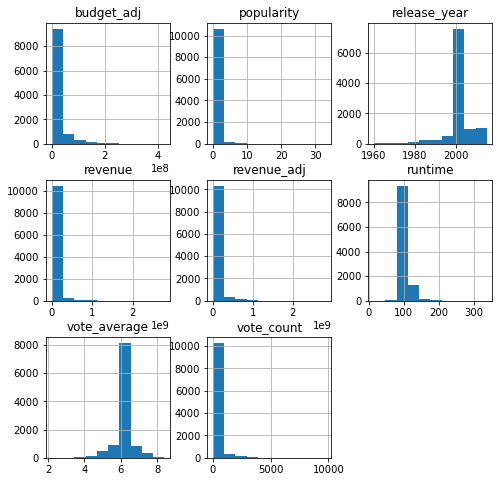

In [180]:
df.hist(figsize=(8,8));

>Lets take the revenue mean based on the release year:

In [181]:
Revenue = df.groupby('release_year')['revenue'].mean()
Revenue

release_year
1960.000000    2.580100e+07
1961.000000    3.377202e+07
1962.000000    2.947569e+07
1963.000000    2.942115e+07
1964.000000    4.694479e+07
1965.000000    9.161637e+07
1966.000000    1.694734e+07
1967.000000    5.629497e+07
1968.000000    2.469131e+07
1969.000000    5.742677e+07
1970.000000    4.999745e+07
1971.000000    2.894513e+07
1972.000000    6.011252e+07
1973.000000    9.291776e+07
1974.000000    5.539746e+07
1975.000000    9.392303e+07
1976.000000    4.999510e+07
1977.000000    9.906097e+07
1978.000000    6.889824e+07
1979.000000    7.381438e+07
1980.000000    5.748329e+07
1981.000000    5.373338e+07
1982.000000    8.290986e+07
1983.000000    6.420325e+07
1984.000000    5.729726e+07
1985.000000    5.519938e+07
1986.000000    4.780115e+07
1987.000000    5.994515e+07
1988.000000    5.485749e+07
1989.000000    8.964569e+07
1990.000000    8.776483e+07
1991.000000    8.726243e+07
1992.000000    9.596928e+07
1993.000000    8.578492e+07
1994.000000    1.052128e+08
1995.00

>Divide the release_year into bins, 10 years between each bin and assign name for them:

In [182]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960', '1970', '1980', '1990', '2010', '2015']

>After creating the bins, create now column 'Years' and cut each 10 years from release_year and assign it to the new column:

In [183]:
df['Years'] = pd.cut(df['release_year'], bins, labels=bin_names)
df.head()

,popularity,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Years
0,32.985763,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015
1,28.419936,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,2015
2,13.112507,2.952382e+08,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,2015
3,11.173104,2.068178e+09,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,2015
4,9.335014,1.506249e+09,137.0,Action|Crime|Thriller,2015-04-01,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,2015


> Create bar plot for the mean revenue for each 10 years:

Text(0, 0.5, 'Number of Revenue')

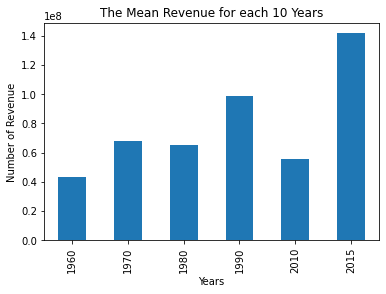

In [185]:
Revenue = df.groupby('Years')['revenue'].mean()
Revenue.plot(kind='bar')
plt.title("The Mean Revenue for each 10 Years")
plt.xlabel("Years")
plt.ylabel("Number of Revenue")

>From the plot above, we noticed that the high revenue in 2015. 
Now, we will take three properties: popularity, revenue, and vote_count to find which property associated with high revenue:

>Make scatter plot for the revenue with the three proprties and see the result:

Text(0, 0.5, 'Number of Revenue')

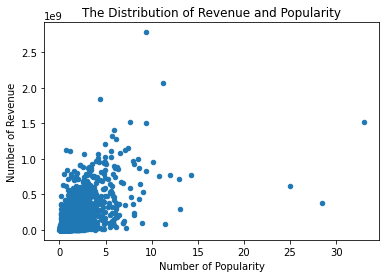

In [186]:
df.plot(x="popularity", y="revenue", kind="scatter");
plt.title("The Distribution of Revenue and Popularity")
plt.xlabel("Number of Popularity")
plt.ylabel("Number of Revenue")

Text(0, 0.5, 'Number of Revenue')

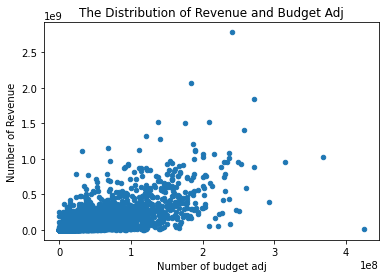

In [187]:
df.plot(x="budget_adj", y="revenue", kind="scatter");
plt.title("The Distribution of Revenue and Budget Adj")
plt.xlabel("Number of budget adj")
plt.ylabel("Number of Revenue")

Text(0, 0.5, 'Number of Revenue')

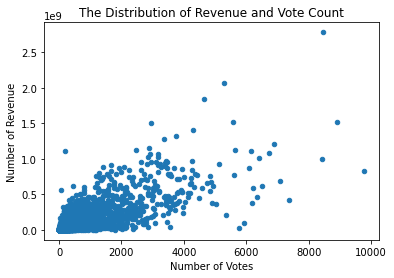

In [188]:
df.plot(x="vote_count", y="revenue", kind="scatter");
plt.title("The Distribution of Revenue and Vote Count")
plt.xlabel("Number of Votes")
plt.ylabel("Number of Revenue")

>From the scatter plots above, we found that the revenue with popularity have no correlation however, the revenue with budget_adj and revenue with vote_count having positive correlation.
> to be more clear with the result, we will calculate the correlation for each properties:

In [189]:
df['popularity'].corr(df['revenue'])

0.6454630182881417

>The correlation for popularity and revenue is 0.65

In [190]:
df['vote_count'].corr(df['revenue'])

0.7727155381111702

>The correlation for vote_count and revenue is 0.77

In [191]:
df['budget_adj'].corr(df['revenue'])

0.6915285439658113

>The correlation for budget_adj and revenue is 0.69

>So, based on correlation results the correlation result of popularity is have the least value and now we can say that vote_count with 0.77 correlation and budget_adj with 0.69 correlation are the proprties associated with movies that have high revenues.

### Research Question 2 :
### Which genres are most popular from year to year?

>To find the most popular genres. First, let's find all unique genres:

In [192]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

>The genres column have list values and we have to split them into multiple rows so that we can use it. First, make a copy of the original data frame by creating new data frame: 

In [193]:
New_DataFrame  = df[['popularity','revenue','runtime','genres','release_date','vote_count',
           'vote_average','release_year','budget_adj','revenue_adj', 'Years']]
New_DataFrame.head()

,popularity,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Years
0,32.985763,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015
1,28.419936,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,2015
2,13.112507,2.952382e+08,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,2015
3,11.173104,2.068178e+09,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,2015
4,9.335014,1.506249e+09,137.0,Action|Crime|Thriller,2015-04-01,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,2015


>Second, create split variable to hold the changes of the genres column of the new data frame, first will be split them using '|' and expand them by rows, then reset the arrangment of the indexes by droping thier levels and assign name for the new column genres.

>Referance: https://stackoverflow.com/questions/47571618/how-to-split-expand-a-string-value-into-several-pandas-dataframe-rows

In [194]:
split_var = New_DataFrame['genres'].str.split('|',expand=True).stack().reset_index(level=-1, drop=True)
split_var.name = 'genres'

>After that, drop the genres column from the new dataframe and combine both data frames together:

In [195]:
New_DataFrame = New_DataFrame.drop('genres',axis=1)
df = New_DataFrame.join(split_var)

>Here is the the genres column separated into different rows:

In [196]:
df.head()

,popularity,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Years,genres
0,32.985763,1.513529e+09,124.0,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015,Action
0,32.985763,1.513529e+09,124.0,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015,Adventure
0,32.985763,1.513529e+09,124.0,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015,Science Fiction
0,32.985763,1.513529e+09,124.0,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015,Thriller
1,28.419936,3.784364e+08,120.0,2015-05-13,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,2015,Action


>Now, let's create a famous genres data frame to find the most popular genre based on genres and popularity by creating a defined function of the group:

In [197]:
famous_genres_df  = df[['popularity','genres','release_year']]
famous_genres_df.head()

,popularity,genres,release_year
0,32.985763,Action,2015.0
0,32.985763,Adventure,2015.0
0,32.985763,Science Fiction,2015.0
0,32.985763,Thriller,2015.0
1,28.419936,Action,2015.0


In [198]:
def func(group):
    return group.loc[group['popularity'] == group['popularity'].mean()]
famous_genres_func = famous_genres_df.groupby(['genres'], as_index=False)[['popularity','release_year']].mean()
famous_genres_func.sort_values(by='popularity', ascending=False, inplace=True)
famous_genres_func

,genres,popularity,release_year
15,Science Fiction,1.873294,1999.942197
1,Adventure,1.867693,2000.178905
8,Fantasy,1.754315,2001.184343
2,Animation,1.710622,2003.930348
0,Action,1.567116,2000.682028
7,Family,1.459043,2001.682353
17,Thriller,1.258950,2001.274086
18,War,1.246129,1997.932773
13,Mystery,1.142613,2000.781977
19,Western,1.134246,1993.384615


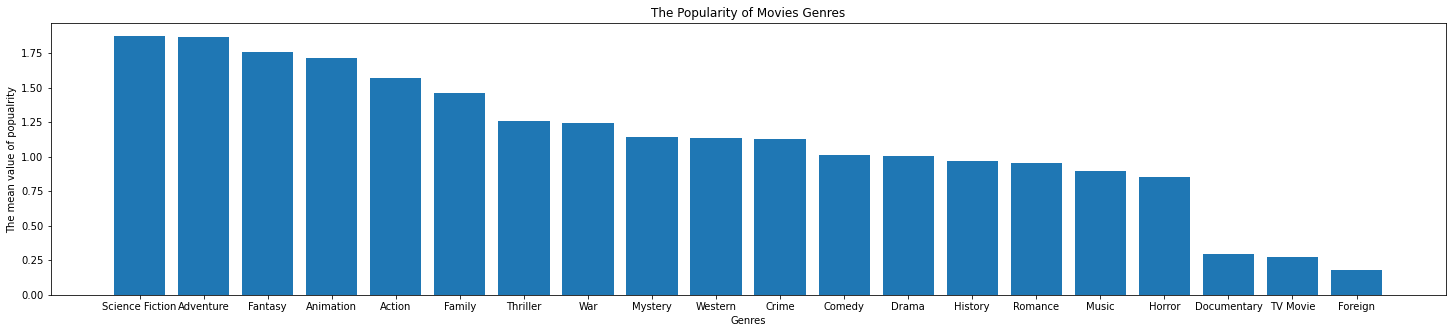

In [115]:
fig, ax = plt.subplots(figsize=(25,5))
plt.bar(famous_genres_func.genres, famous_genres_func.popularity)
plt.title('The Popularity of Movies Genres')
plt.xlabel('Genres')
plt.ylabel('The mean value of popualrity');

> From the graph above we found Science Fiction, Adventure, and Fantasy are the most popular genres. And, the genres sorted from most popularity to least popularity: 

In [199]:
famous_genres_func.head(5)

,genres,popularity,release_year
15,Science Fiction,1.873294,1999.942197
1,Adventure,1.867693,2000.178905
8,Fantasy,1.754315,2001.184343
2,Animation,1.710622,2003.930348
0,Action,1.567116,2000.682028


>The top five genres are Science Fiction, Adventure, Fantasy, Animation, and Action

In [200]:
famous_genres_func.tail(5)

,genres,popularity,release_year
12,Music,0.899005,1998.772059
11,Horror,0.854005,1999.667387
5,Documentary,0.294458,2004.742857
16,TV Movie,0.273628,1996.000000
9,Foreign,0.179608,2001.461538


>The last five genres are Music, Horror, Documentary, TV Movie, and Foreign

>In the following plot shows the mean popularity of genres over the years:

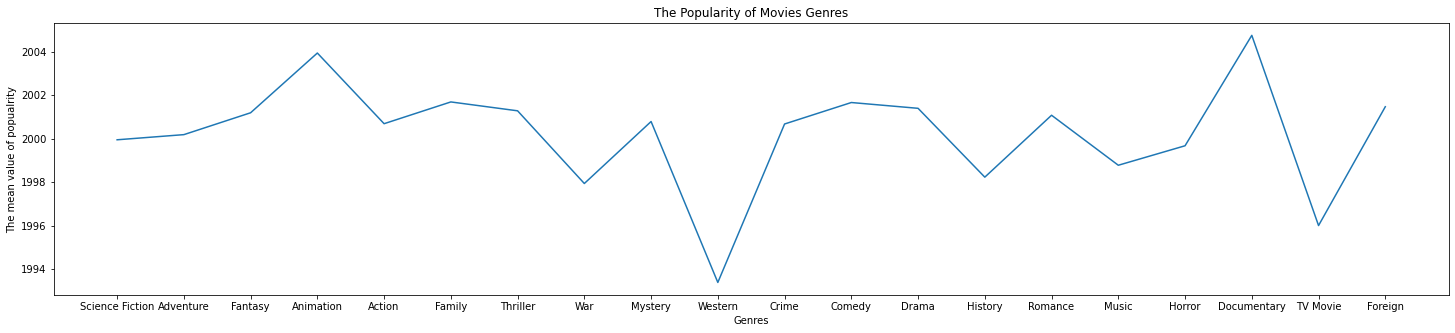

In [201]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(famous_genres_func.genres, famous_genres_func.release_year )
plt.title('The Popularity of Movies Genres')
plt.xlabel('Genres')
plt.ylabel('The mean value of popualrity');

>In addition, here is another scatter graph shows the distribution of popular genres using points
Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0.5, 1.0, 'The Popularity of Movies Genres over the years')

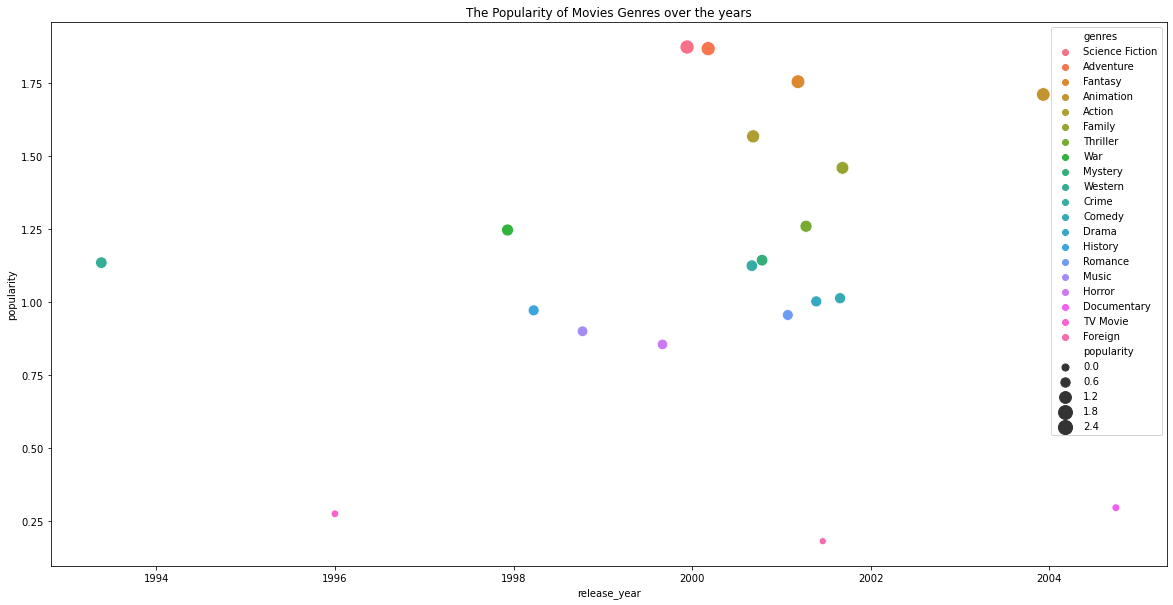

In [202]:
fig, ax = plt.subplots(figsize=(20,10))
graph2 = sns.scatterplot(data=famous_genres_func, x='release_year', y='popularity', hue='genres',
                    size='popularity',sizes=(50, 200), legend='brief')
plt.title('The Popularity of Movies Genres over the years')

## What are the genres that have high releases?

>Use count function to find the number of releases of each genre:

In [203]:
high_release=df['genres'].value_counts()
high_release

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

Text(0, 0.5, 'Number of Releases')

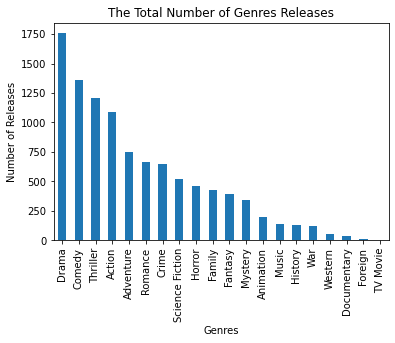

In [206]:
high_release.plot(kind='bar')
plt.title("The Total Number of Genres Releases")
plt.xlabel("Genres")
plt.ylabel("Number of Releases")

>From the above graph the top five genres which have high release are Drama, Comedy, Thriller, Action, and Adventure

<a id='conclusions'></a>
## Conclusions


### Limitation and challengaes:


>The TMDB- Movies dataset was enough to make the exploration and analyze it. However, there are many faced challenges. First, the number of zero values for revenue, budget_adj, and revenue adj were high and this lead to an inappropriate result so, I choose to replace them with the mean values to avoid any loss or effect on the result. Also, based on the analysis of this project, there is no right or wrong answer of the analysis and this considers as one of the project limitations. Another challenge, the genres column consists of a values list and this is a hindrance to analyze the most popular genre so, I go with the splitting function to solve the problem.

At the end, based on the exploration of the data showed the revenue increased in 2015 also, between the three properties popularity, vote_count, and budget_adj the revenue was high with vote_count and budget_adj. 
The most popular genres from year to year are as the follwing:

1- Science Fiction	
2- Adventure
3- Fantasy	
4- Animation
5- Action	
6- Family	
7- Thriller	
8- War	
9- Mystery	
10- Western
11- Crime	
12- Comedy	
13- Drama	
14- History	
15- Romance	
16- Music	
17- Horror	
18- Documentary	
19- TV Movie	
20- Foreign	

The time period  between 2000 and 2002 has the most popular genres.

From the above graph the top five genres which have high release are Drama, Comedy, Thriller, Action, and Adventure.

